In [4]:
import numpy as np
import pocomc as pc
import corner

In [5]:
d = np.load("../results/results_feb13_4bins.npz", allow_pickle=True)
results = d["results"][()]
true_params = d["true_params"][()]

In [6]:
d

NpzFile '../results_feb13_4bins.npz' with keys: results, true_params, noise, noise_cov_inv

In [7]:
bins = list(results.keys())
nfg = list(results[bins[0]].keys())
best = []  # nfg with max evidence

for b in bins:
    print(f"Bin {b}:")
    print("----------")
    bic_min = np.inf
    for n in nfg:
        bic = results[b][n]["bic"]
        if bic < bic_min:
            bic_min = bic
            best_n = n
        chi2_r = bic - (n+3)*np.log(61)
        chi2_r /= (61 - n - 3)
        print(f"nfg={n}, bic={bic:.3f}, chi2_r={chi2_r:.3f}")
    best.append(best_n)
    print("\n")

Bin 0:
----------
nfg=4, bic=84.458, chi2_r=1.031
nfg=5, bic=67.901, chi2_r=0.661


Bin 1:
----------
nfg=4, bic=111.015, chi2_r=1.523
nfg=5, bic=88.170, chi2_r=1.043


Bin 2:
----------
nfg=4, bic=96.717, chi2_r=1.258
nfg=5, bic=84.904, chi2_r=0.981


Bin 3:
----------
nfg=4, bic=111.929, chi2_r=1.540
nfg=5, bic=102.923, chi2_r=1.321




In [17]:
def print_stats(results):
    estimated_params = results["theta_map"]
    std_vals = np.std(results['samples'], axis=0)
    print('Mean values = ', estimated_params)
    print('Standard deviation values = ', std_vals)
    print()
    print(f"Relative errors %: {100 * np.abs(1 - np.array(list(true_params.values())) /estimated_params)}")
    print(f"Number of sigmas from truth: {np.abs(estimated_params-np.array(list(true_params.values())))/std_vals}")

def plot(r, labels=["a", "w", "$\\nu_{21}$"]):
    #pc.plotting.run(r, width=7, height=7)
    #pc.plotting.trace(r, labels=labels)
    _ = corner.corner(r["samples"], labels=labels, color="royalblue", truths=list(true_params.values()), truth_color="k")
    return

In [18]:
print(best)

[5, 5, 5, 5]


In [19]:
r

{'samples': array([[-0.24014349, 21.04255234, 79.88972996],
        [-0.2359025 , 21.00538669, 79.63953562],
        [-0.2359025 , 21.00538669, 79.63953562],
        ...,
        [-0.23180422, 20.70984811, 80.09448914],
        [-0.21881979, 20.46989295, 79.96614279],
        [-0.21962594, 20.29008342, 79.68348344]]),
 'theta_map': array([-0.22481319, 20.39066654, 79.72347666]),
 'bic': 102.92294275127159}

Mean values =  [-0.24874238 21.01719105 79.53254272]
Standard deviation values =  [0.01764317 0.83021305 0.18031098]

Relative errors %: [19.59552841  4.83980494  0.58775599]
Number of sigmas from truth: [2.76267698 1.2252169  2.59250594]
------------
Mean values =  [-0.26303679 22.03918524 79.80391591]
Standard deviation values =  [0.02388361 1.01999229 0.20056887]

Relative errors %: [23.96500922  9.25254369  0.24570735]
Number of sigmas from truth: [2.63933254 1.99921633 0.97763971]
------------
Mean values =  [-0.26157253 21.49783968 79.30920271]
Standard deviation values =  [0.01979642 0.8866852  0.20198216]

Relative errors %: [23.53937053  6.96739628  0.87101783]
Number of sigmas from truth: [3.11028568 1.68925757 3.42009062]
------------
Mean values =  [-0.22481319 20.39066654 79.72347666]
Standard deviation values =  [0.01600475 0.85833092 0.19131313]

Relative errors %: [11.03725015  1.91590864  0.34685309]
Number of sigmas from truth: [1.55036488 0.45514676 1.44539655]
-----

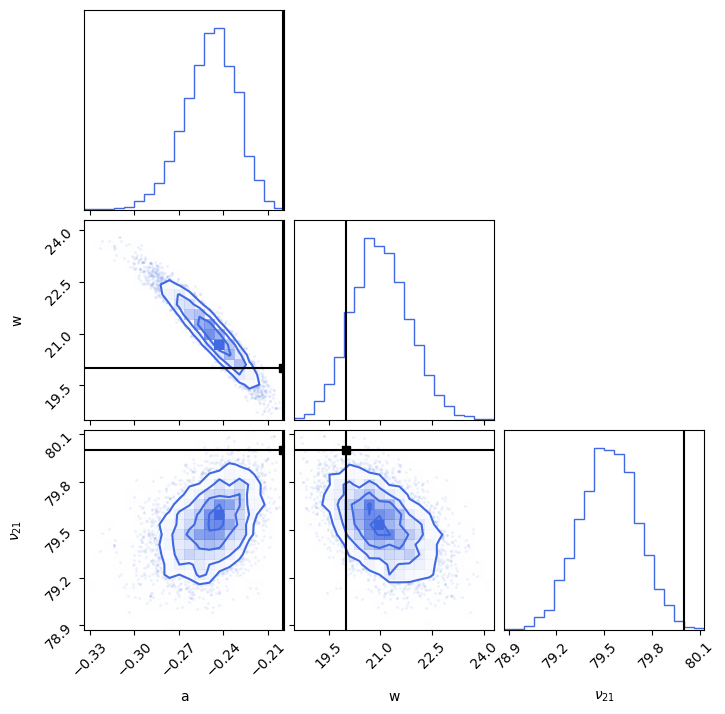

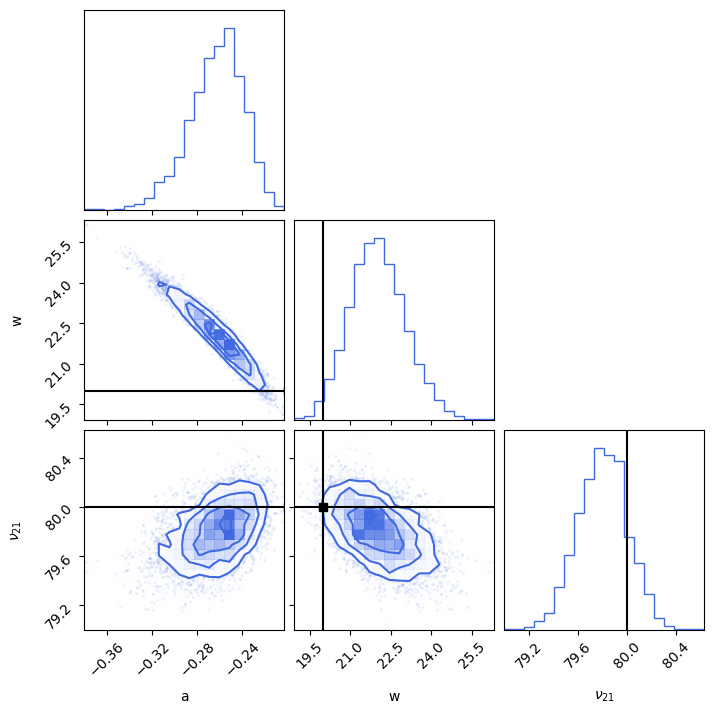

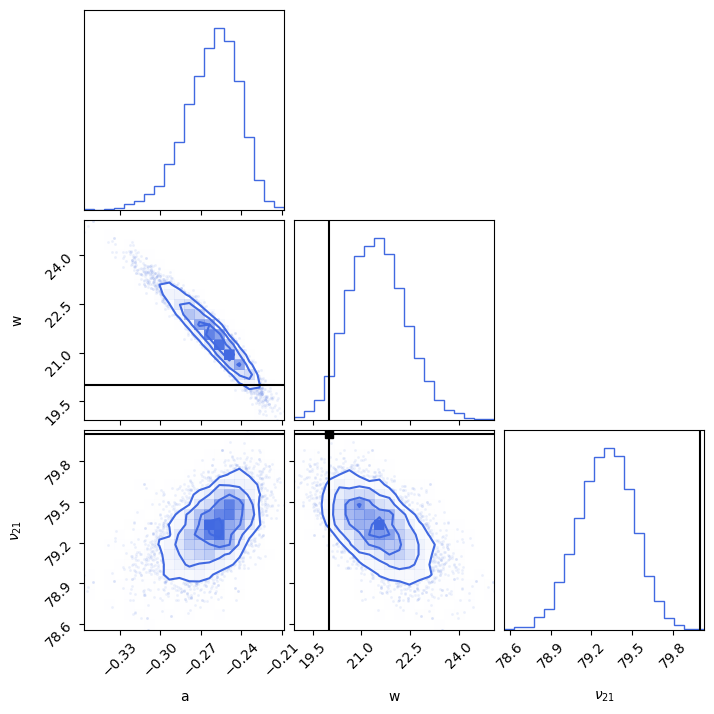

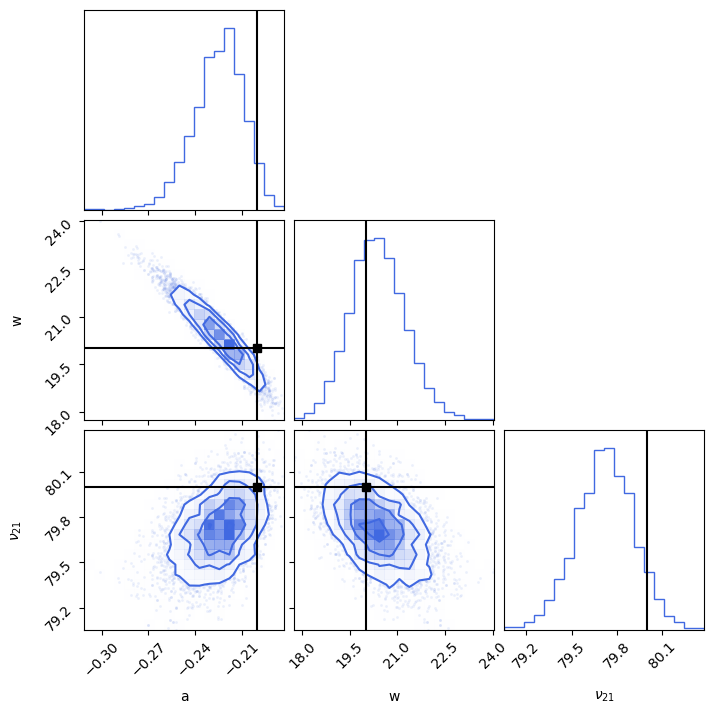

In [20]:
for i in range(len(results)):
    r = results[i][best[i]]
    plot(r)
    print_stats(r)
    print("------------")